# COGS 108 - Assignment 2: Data Exploration

# Important

- Rename this file to 'A2_A########.ipynb' (filled in with your student ID) before you submit it. Submit it to TritonED.
- This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted. 
    - This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!

## Part 1 - Data Wrangling

You are provided with two data files:
- age_steps.csv
- name_income_id.json

In [247]:
# Imports
#  Note: these are all the imports you need! Do not import any other functions / packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [248]:
# 1a) Load the csv file into a pandas dataframe. Call it 'df_steps'.
csvfile = 'age_steps.csv'
df_steps = pd.read_csv(csvfile)

In [249]:
assert isinstance(df_steps, pd.DataFrame)


In [250]:
# 1b) Load the json file into a (different) pandas dataframe. Call it 'df_income'.
jsonfile = 'name_income_id.json'
df_income = pd.read_json(jsonfile)

In [251]:
assert isinstance(df_income, pd.DataFrame)


In [252]:
# 1c) Drop the 'first_name' and 'last_name' columns from the df_income data frame.
df_income = df_income[['id','income']]

In [253]:
assert 'first_name' not in df_income.columns
assert 'last_name' not in df_income.columns

In [254]:
# 1d) Combine the two dataframes into one combined, new dataframe. Call it 'df'.
#  Note: For this part, it doesn't in which order you merge the dataframes.
df = pd.merge(df_income, df_steps, on='id')

In [255]:
assert isinstance(df, pd.DataFrame)
assert set(df.columns) == set(['id', 'income', 'age', 'steps'])

In [256]:
# 1e) Re-Order the Column ID's to be [id, age, steps, income]
df = df[['id', 'age', 'steps', 'income']]

In [257]:
assert list(df.columns) == ['id', 'age', 'steps', 'income']

## Part 2 - Data Cleaning

In [258]:
# 2a) First check how many missing data (NaNs) there are in the income data.
#  Save this number into a variable called 'n_nan'
n_nan = np.count_nonzero(np.isnan(df['income']))

In [259]:
assert(n_nan)


In [260]:
# 2b) Remove all rows from df that have missing data (that have NaN values)
df = df.dropna(subset = ['income'])

In [261]:
assert(sum(np.isnan(df['income'])) == 0)

## Data Visualization

- You will be making histograms, check out this example on how to do that.
    - http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
    - This example has more than you need: 
        - Titles, axis labels, etc are optional (but recommended)
        - You do no need to add a 'best fit' line.
- Everywhere that we ask you to create a plot, make sure to leave the 'plt.gcf()' line at the end of the cell. 
    - This is used to get a figure handle in order to programmatically evaluate your plots.
- For all your histograms, use 25 bins

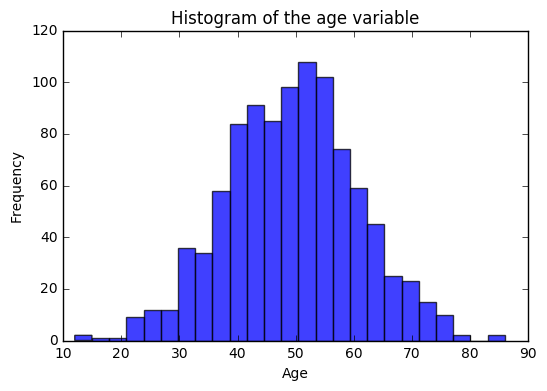

In [262]:
# 2c) Plot the histogram of the age variable
n, bins, patches = plt.hist(df['age'], 25, normed=0, alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title(r'Histogram of the age variable')
f1 = plt.gcf()

In [263]:
assert f1.gca().has_data()

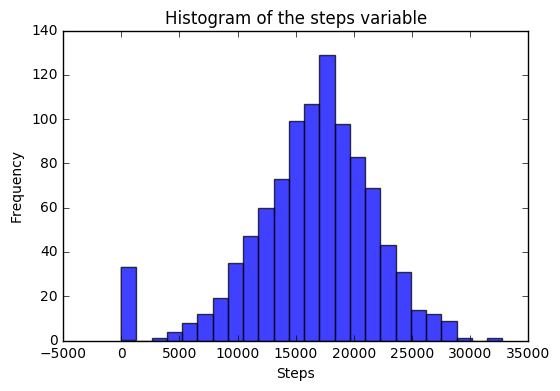

In [264]:
# 2d) Plot the histogram of the steps variable
# YOUR CODE HERE
n, bins, patches = plt.hist(df['steps'], 25, normed=0, facecolor='blue', alpha=0.75)
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.title(r'Histogram of the steps variable')
f2 = plt.gcf()

In [265]:
assert f2.gca().has_data()

### M1 - What do you notice about steps data from the plot?

We can see an unexpected spike at 0(Frequency >=30). This can be bad data and needs to be removed.

In [266]:
# 2e) Check how many -1 values there are in steps. Save the number into a variable called 'n_neg'
n_neg = np.count_nonzero((df['steps']== -1))
n_neg

33

In [267]:
assert(n_neg)


In [268]:
# 2f) Remove all rows where steps is equal to -1
df = df[df.steps != -1]

In [269]:
assert -1 not in df['steps']

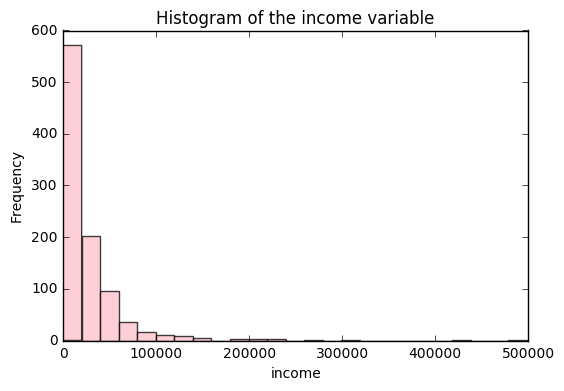

In [270]:
# 2g) Plot the histogram of the income variable
n, bins, patches = plt.hist(df['income'], 25, normed=0, facecolor='pink', alpha=0.75)
plt.xlabel('income')
plt.ylabel('Frequency')
plt.title(r'Histogram of the income variable')
f3 = plt.gcf()

In [271]:
assert f3.gca().has_data()

### M2 - What do you notice about the income data from the plot?

The histogram is positively skewed (skewed to the right). 

In [272]:
# 2h) For all rows in which income is equal to zero, recode income to be equal to 1
df.loc[df['income'] == 0, 'income'] = 1

In [273]:
assert sum(df['income'] == 0.) == 0

In [274]:
# 2i) Transform income using a log10 transform
df['income'] = np.log10(df['income']) 

In [275]:
assert np.isclose(min(df['income']), 0.0, 0.1)
assert np.isclose(max(df['income']), 5.69, 0.1)

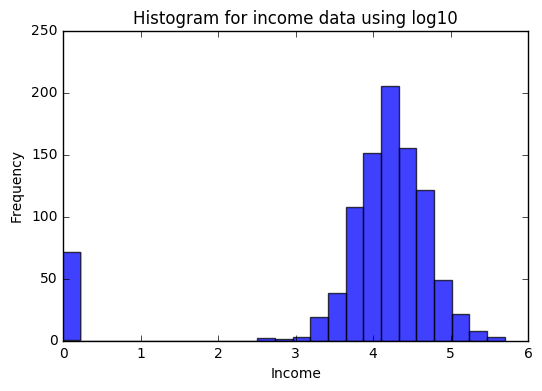

In [276]:
# 2j) Replot the histogram for income data after the data transformation
n, bins, patches = plt.hist(df['income'], 25, normed=0, facecolor='blue', alpha=0.75)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title(r'Histogram for income data using log10')
f4 = plt.gcf()

df = df[df['income'] > 0]

In [277]:
assert f4.gca().has_data()

### M3 - What do you notice about the income data after you replot it?

Frequency at 0 is still high. Overall histogram looks well-distributed.

In [278]:
# 2k) Remove all rows where age is less than 18
df = df[df.age >= 18]

In [279]:
assert min(df['age']) >= 18

### Removing outliers
Next, we're going to remove all rows where the data for the steps column exceeds +/- 3 standard deviations above or below the mean.

In [280]:
# 2l) For the steps data: 
# - Calculate what three times the standard deviation is, and save it to variables called 'std3'. 
# - Using 'std3', create new variables, called std_max' and 'std_min'.
#    These will store our cut-off values: 3 std above and below the mean respectively. 

std3 = 3*df.steps.std()
std_max = df.steps.mean() + std3
std_min = df.steps.mean() - std3

In [281]:
assert(std3)
assert(std_min)
assert(std_max)


In [282]:
# 2m) Now use these values to remove any rows with steps data above or below these thresholds
df = df[df.steps <=  std_max]
df = df[df.steps >= std_min]

In [283]:
assert min(df['steps']) > 3446
assert max(df['steps']) < 30594

In [284]:
# Check that the following test passes - if it fails, you have the wrong amount of data left. 
#  If so, go back and try to fix your cleaning steps, else your analysis answers will be wrong.
assert df.shape == (879, 4)

## Part 3 - Basic Analyses

In [285]:
# 3a) Calculate the pairwise correlations between all variables. 
#  Notes: do this with a pandas function. Keep all columns (including ID).

corrs = df.corr()

In [286]:
assert isinstance(corrs, pd.DataFrame)
assert corrs.shape == (4, 4)

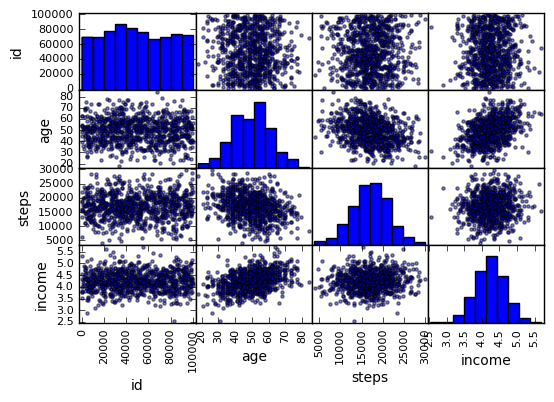

In [287]:
# 3b) Plot the data using pandas scatter_matrix, saving it to output variable name 'fd'.
fd = pd.scatter_matrix(df)

In [288]:
fd[0][0].axes.has_data()

True

# Part 4 - Predictions

Notes:
- Use the polyfit function from np, in the way that we did in 'SectionMaterials/02-DataAnalysis
- The predictions should be in dollars (so you'll have to 'un-log' the prediction)

In [289]:
# 4a) Use polyfit to fit a 1-degree linear model, predicting income from age.
#  Call the output parameters 'a1' and 'b1'
a1,b1 = np.polyfit(df['age'], df['income'], 1)

In [290]:
assert(a1)
assert(b1)


In [292]:
# 4b) Use the model parameters from 4a to predict the income of a 75 year old. Call your prediction 'pred1'.
#  Note: Convert the prediction to be in real dollars (not log dollars)
pred1 = 10**(a1*75 + b1)

In [293]:
assert(pred1)


In [294]:
# 4c) Use polyfit to fit a 1-degree linear model, predicting income from steps. 
#  Call the output parameters 'a2' and 'b2'
a2,b2 = np.polyfit(df['steps'], df['income'], 1)

In [295]:
assert(a2)
assert(b2)


In [296]:
# 4d) Predict the income of someone who took 20,000 steps. Call your prediction 'pred2'.
#  Note: Convert the prediction to be in real dollars (not log dollars)
pred2 = 10**(a2*20000+b2)

In [297]:
assert(pred2)


In [301]:
# 4e) Based on your analysis in Part 3, which model do you think is more likely to have made a good prediction?
#  Create a variable called 'better_model', and set it equal to 'age' or 'steps', whichever your answer is.
better_model = 'age'

In [299]:
assert better_model

### M4 - Why do you think (whichever model you answered) is better?

Age is better because from Part 3 it appears that we can make out a line of best fit for a scatterplot between age and income. Whereas, no clear line of best fit is visible for steps vs income.

## Done! Upload this notebook to TritonED